## Problem Statement
The objective of this project is to predict trip durations for Uber rides based on historical trip data. Accurate prediction of trip duration is critical for improving the efficiency of ride allocation, customer satisfaction, and operational planning for Uber. Factors such as time of day, day of the week, traffic patterns, and trip distance significantly influence trip durations. This project aims to build a machine learning model that can accurately estimate the trip duration based on various features extracted from the dataset, ultimately helping Uber optimize its ride service.

## Introduction 
In the age of urban mobility, ride-hailing services such as Uber have revolutionized the way people commute. As Uber continues to expand, accurate prediction of trip durations becomes essential for improving customer satisfaction and operational efficiency. Knowing how long a trip will take helps Uber better manage driver availability, minimize passenger waiting times, and optimize pricing algorithms.

This project focuses on analyzing historical Uber trip data to build a predictive model that can estimate the duration of a trip. The dataset contains a variety of attributes, including trip start and end times, pickup and drop-off locations, and trip distances. By applying machine learning techniques, we aim to identify the key factors that influence trip durations and develop a model to predict them accurately.

### The workflow of the project includes:

1. Data Preprocessing: Cleaning the dataset, handling missing values, and preparing the data for analysis.
2. Exploratory Data Analysis (EDA): Visualizing and analyzing patterns in the data to gain insights.
3. Feature Engineering: Creating new features such as trip distance, day of the week, and time of day that may improve model accuracy.
4. Model Building: Training machine learning models to predict trip duration.
5. Model Evaluation: Assessing the model's performance using appropriate metrics.
6. Visualization: Displaying key findings and model outcomes through data visualizations.
Through this project, we aim to provide an understanding of how various factors impact trip duration and deliver a predictive model that can assist Uber in optimizing ride operations.

Through this project, I aim to provide an understanding of how various factors impact trip duration and deliver a predictive model that can assist Uber in optimizing ride operations.

## 1. Data Preprocessing
In this step, I need to clean the data and convert it into the correct format for analysis.

In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
# Load the dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Uber-Jan.csv")

In [130]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,01-01-2015,190,1132
1,B02765,01-01-2015,225,1765
2,B02764,01-01-2015,3427,29421
3,B02682,01-01-2015,945,7679
4,B02617,01-01-2015,1228,9537


In [131]:
# Checking for missing values
print(df.isnull().sum())

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


In [132]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [133]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [134]:
# Checking data types to confirm changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB
None


## 2. Exploratory Data Analysis (EDA)
EDA helps us better understand the dataset by summarizing its characteristics.

### a. Descriptive Statistics:

In [135]:
# Descriptive statistics
print(df.describe())

                                date  active_vehicles         trips
count                            354       354.000000    354.000000
mean   2015-03-31 05:13:13.220338944      1307.435028  11667.316384
min              2015-01-01 00:00:00       112.000000    629.000000
25%              2015-01-25 00:00:00       296.750000   2408.500000
50%              2015-02-19 00:00:00      1077.000000   9601.000000
75%              2015-05-02 00:00:00      1417.000000  13711.250000
max              2015-12-03 00:00:00      4395.000000  45858.000000
std                              NaN      1162.510626  10648.284865


In [136]:
# Count unique bases
print(df['dispatching_base_number'].nunique())

6


<Axes: title={'center': 'Trip Distribution'}, ylabel='Frequency'>

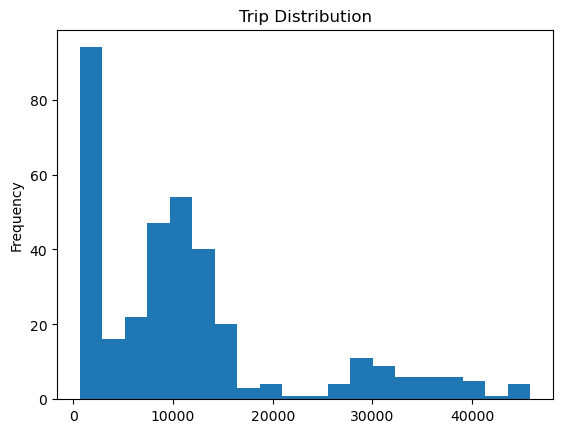

In [137]:
# Checking distribution of trips
df['trips'].plot(kind='hist', bins=20, title='Trip Distribution')

### b. Trips per Day:

In [138]:
# Group trips by date
trips_per_day = df.groupby(df['date'].dt.date)['trips'].sum()

<Axes: title={'center': 'Trips per Day'}, xlabel='date'>

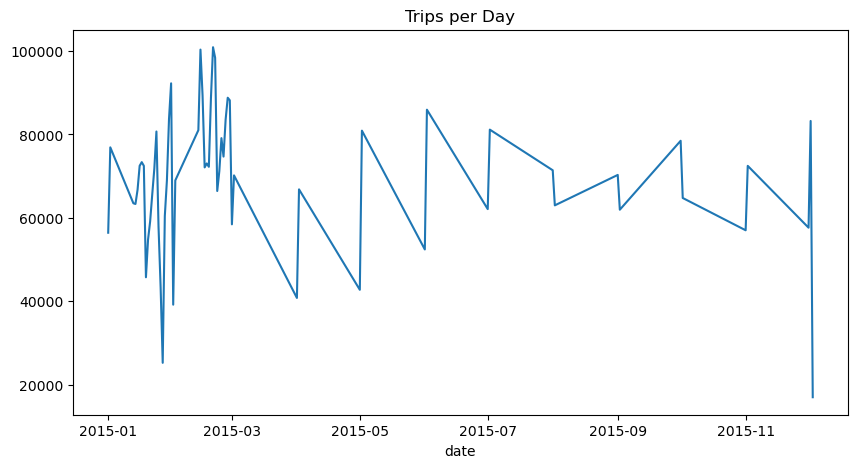

In [139]:
# Trips per day plot
trips_per_day.plot(kind='line', figsize=(10,5), title='Trips per Day')

### c. Active Vehicles and Trips Correlation:

In [140]:
# Correlation between active vehicles and trips
correlation = df[['active_vehicles', 'trips']].corr()
print(correlation)

                 active_vehicles     trips
active_vehicles         1.000000  0.980493
trips                   0.980493  1.000000


<Axes: >

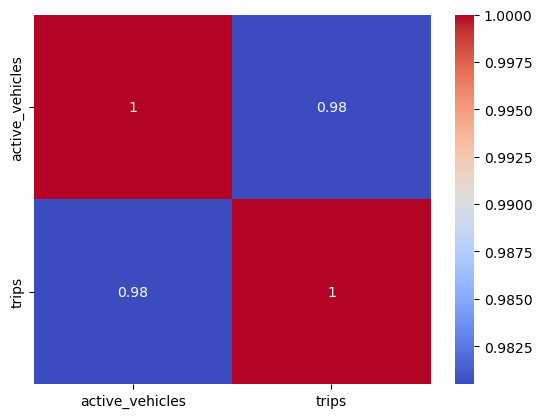

In [141]:
#Scatter plot of active vehicles vs trips
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## 3. Feature Engineering
Feature engineering involves creating new variables or transforming existing ones to improve the performance of a model.

### a. Extracting Time Features:
From the Date column, we will extract features like the day of the week and month to see how trips vary with time.

In [142]:
# Extracting day of the week and month
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month

In [143]:
# Mapping day of the week for ordinal encoding (optional)
df['day_of_week_num'] = df['date'].dt.weekday

### b. Rolling Averages:
Calculate rolling averages to smooth the data and account for short-term fluctuations in trip demand.

In [144]:
# 7-day rolling average for trips
df['trips_rolling_avg'] = df['trips'].rolling(window=7).mean()

<Axes: title={'center': 'Trips and Rolling Average'}, xlabel='date'>

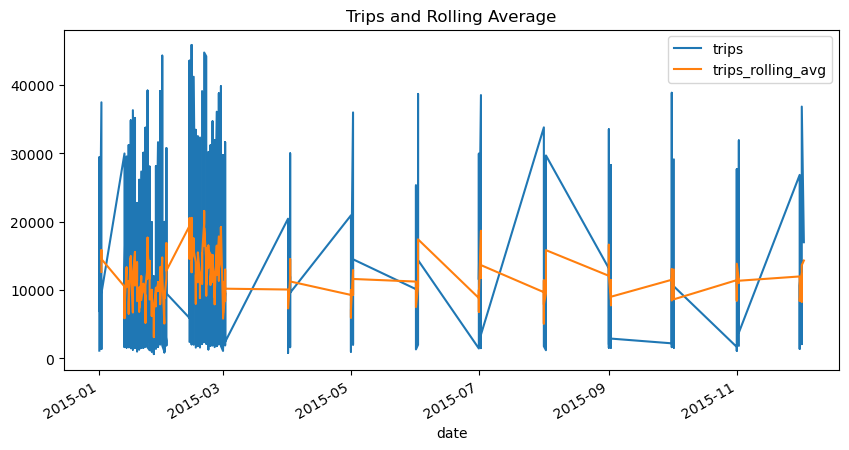

In [145]:
# Plot the rolling average of trips
df[['date', 'trips', 'trips_rolling_avg']].set_index('date').plot(figsize=(10, 5), title='Trips and Rolling Average')

## 4. Model Building

Now that I have preprocessed and analyzed the data, I can build a predictive model. Now I am predicting the number of trips based on features such as the day_of_week, Active vehicles, and other engineered features.

### a. Preparing the Data:
I will select features and split the data into training and test sets.

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Select features and target
X = df[['active_vehicles', 'day_of_week_num']]  # Add more features as necessary
y = df['trips']

In [153]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### b.  Linear Regression Model (as a baseline)
We will use a simple Linear Regression model as an initial approach.

In [154]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

In [155]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [156]:
# Predictions
y_pred_linear = model.predict(X_test)

In [157]:
y_pred_linear

array([36983.71995763,  2835.54425095,  8897.15355296,  2500.74948389,
        8445.17345909, 12467.90281803,  9047.56708963,  1722.13259611,
        2374.07038284, 35151.6198795 , 12267.94512518, 13195.63974854,
       12879.38726294,  2622.68169782, 11466.92960287,  5943.03857979,
        7915.16788629, 30628.25680456, 13114.20318357,  5857.30039474,
       13168.49422688,  1988.84092553, 31613.65355727,  1065.44792226,
        4644.3551605 ,  3544.73889999,   821.13822738, 11000.70884763,
        8766.61809884,  8073.73939612,  9558.1398469 ,  8821.35440918,
       36966.06821023,  8269.39546888, 33509.98371998,  1798.82227395,
        9399.56833707,  9371.97754839,  2278.83842353, 13236.58066453,
       37477.53150156, 30373.56280137, 14403.83809565,  1617.85212959,
        2622.68169782,  2120.2669137 , 11901.70321636,  7730.34138886,
       10734.89105227,  9187.15105096,  9843.83572481, 12133.10805097,
       33775.80151534, 33360.01545034, 11430.735574  , 11621.1994926 ,
      

### c. Random Forest Regressor

In [158]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [159]:
y_pred_rf

array([38178.84 ,  2060.89 ,  9461.61 ,  1643.525,  8592.01 , 13074.25 ,
        8000.13 ,  1491.57 ,  1636.125, 34397.73 , 12639.99 , 13192.68 ,
       15354.83 ,  1933.15 , 12048.93 ,  5672.52 ,  7962.25 , 32422.91 ,
       13095.59 ,  6181.23 , 13068.86 ,  1701.64 , 32309.69 ,  1562.06 ,
        4927.83 ,  4735.99 ,  1438.84 , 10750.57 ,  9343.97 ,  8098.   ,
        9198.32 ,  7828.3  , 37111.31 ,  7026.7  , 36889.43 ,  1808.75 ,
        9041.41 ,  8678.47 ,  1517.73 , 14794.67 , 39644.63 , 30787.84 ,
       15979.67 ,  1585.44 ,  1933.15 ,  2007.81 , 11182.36 ,  6906.35 ,
       11148.63 ,  8975.65 ,  9392.83 , 13356.72 , 34271.6  , 30591.99 ,
       11871.08 , 10922.13 ,  8581.02 , 12517.74 , 27959.92 , 12126.81 ,
       28521.26 , 36899.6  , 13081.25 ,  8941.09 ,  1912.81 ,  1695.78 ,
        6431.42 ,  8648.22 , 13041.78 , 10998.53 ,  9856.72 ])

### d. XGBoost Regressor

In [160]:
# Initialize the XGBoost Regressor
xg_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
xg_model.fit(X_train, y_train)

# Predictions
y_pred_xg = xg_model.predict(X_test)

In [161]:
y_pred_xg

array([36954.055 ,  2167.1963,  9657.559 ,  1793.5707,  8883.308 ,
       13161.688 ,  8233.678 ,  1355.021 ,  1716.5697, 29826.383 ,
       12286.1455, 13118.635 , 14591.784 ,  1996.569 , 12075.589 ,
        5976.9824,  7978.04  , 34460.42  , 13132.57  ,  5504.577 ,
       13264.911 ,  1818.8641, 32386.498 ,  1547.7903,  4992.0054,
        3732.8792,  1281.2306, 11033.976 ,  8992.584 ,  8225.738 ,
        9750.629 ,  8159.748 , 33901.777 ,  7279.6504, 40940.996 ,
        1818.8641,  8691.684 ,  8812.686 ,  1572.109 , 14147.799 ,
       40093.457 , 28380.902 , 14799.731 ,  1535.0618,  1996.569 ,
        1893.5742, 10938.72  ,  7204.11  , 11783.136 ,  9034.393 ,
        9485.83  , 11041.669 , 35988.223 , 30272.697 , 11769.926 ,
       11082.678 ,  8883.308 , 12899.378 , 27615.92  , 12227.22  ,
       20101.129 , 39957.22  , 12570.494 ,  8713.931 ,  1832.9648,
        1746.9141,  5508.5513,  8429.339 , 13008.859 , 11187.788 ,
       10141.335 ], dtype=float32)

## 5. Model Evaluation
We will evaluate the performance of the model using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [163]:
# Evaluation for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [164]:
# Evaluation for XGBoost
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

In [165]:
# Print results
print(f'Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}')
print(f'Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}')
print(f'XGBoost - MSE: {mse_xg}, R-squared: {r2_xg}')

Linear Regression - MSE: 3063055.5926786223, R-squared: 0.971593561710892
Random Forest - MSE: 2801983.849389436, R-squared: 0.9740147121407112
XGBoost - MSE: 4178031.38256714, R-squared: 0.961253399735046


## 6. Visualization
Finally, we will visualize key insights and model performance.

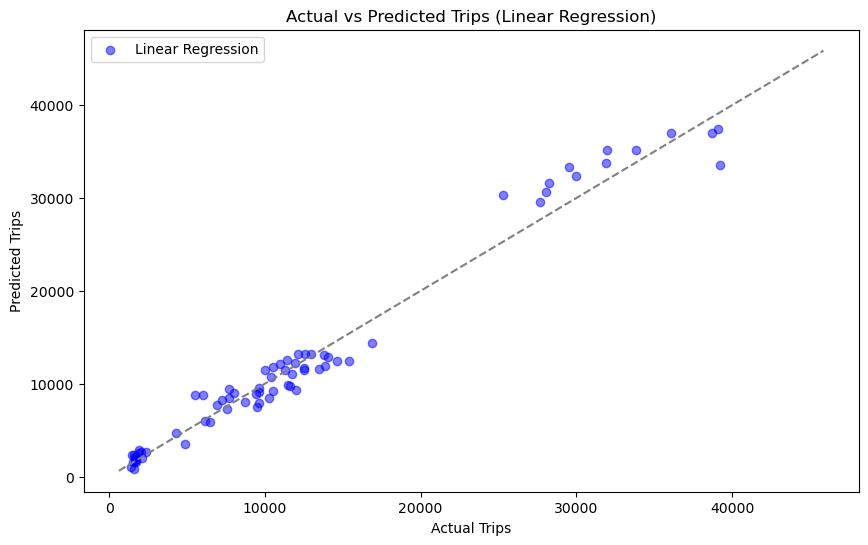

In [166]:
import matplotlib.pyplot as plt

# Plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.title('Actual vs Predicted Trips (Linear Regression)')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.legend()
plt.show()

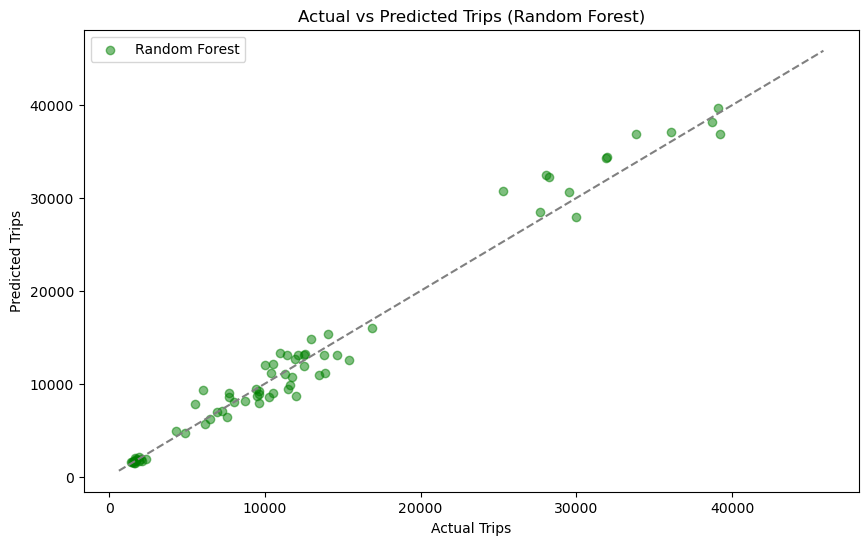

In [167]:
# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.title('Actual vs Predicted Trips (Random Forest)')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.legend()
plt.show()

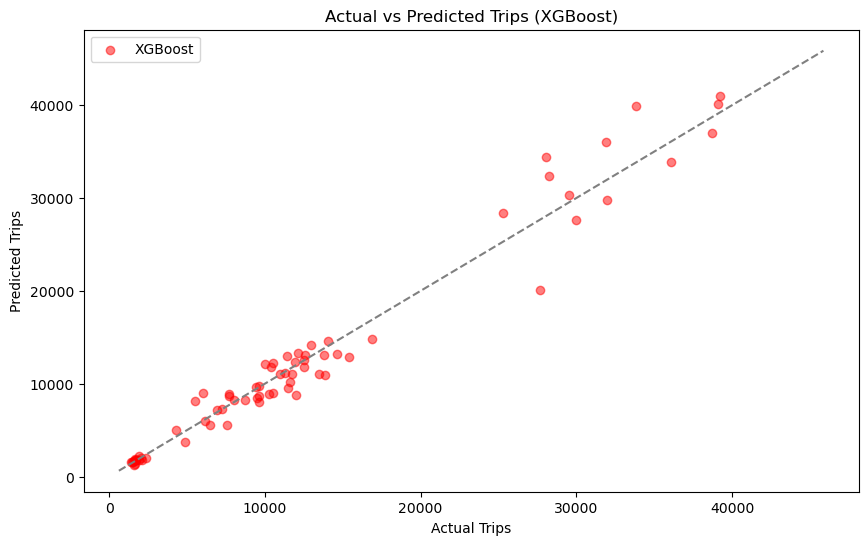

In [168]:
# Plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, alpha=0.5, color='red', label='XGBoost')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.title('Actual vs Predicted Trips (XGBoost)')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.legend()
plt.show()

## Conclusion

1. The linear regression model demonstrates a strong fit to the data, indicated by a high R-squared value of 0.972. This suggests that approximately 97.2% of the variance in the target variable (trips) can be explained by the predictors (active vehicles and day of the week).

2. The random forest model outperforms the linear regression model slightly, with a lower MSE (2,801,983.85) and a higher R-squared value of 0.974. This indicates that it captures more variability in the target variable, which may be due to its ability to handle complex interactions and non-linear relationships in the data.

3. Although the XGBoost model also provides a good fit, it has the highest MSE (4,178,031.38) and the lowest R-squared value (0.961) among the three models. This performance suggests that it may not be as effective as the Random Forest model for this specific dataset.

## Future Work:

Exploring additional features or data points (e.g., time of day, weather conditions, or previous trends) may improve predictive accuracy.

Implementing ensemble methods or model stacking could also be considered for potentially better performance.

### Considerations:

While the Random Forest model has performed the best, it is essential to consider factors such as interpretability, computational efficiency, and the context of the application when selecting a final model for deployment. Linear regression, while slightly less accurate, is more interpretable and easier to communicate to stakeholders.
Further tuning of hyperparameters and cross-validation may enhance model performance, especially for Random Forest and XGBoost.